# Preliminaries 1: Classical optimization in the Era of Machine Learning


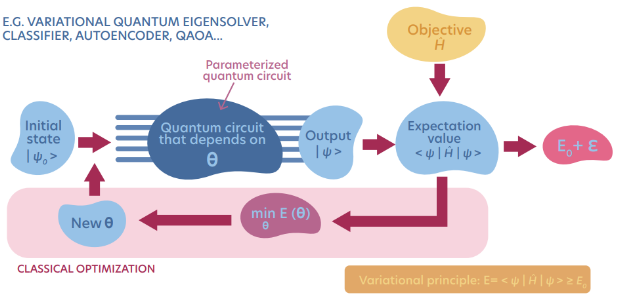


## 1. The objective in most of the machine learning tasks, including QML, is to minimize a given cost function ${\cal L}(\theta)$ with respect to trainable parameters $\theta$.


## 2. Finding optimal parameters $\theta$ is done with iterative update 

### \begin{equation}
 \theta_{i+1} = \theta_i - \eta \frac{\partial {\cal L(\theta_i)}}{\partial \theta}
\end{equation}

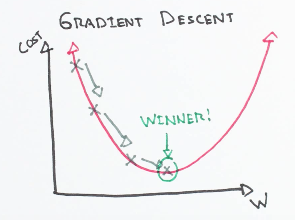


# Optimization algorithms


## Gradient descent

### \begin{equation}
 \theta_{i+1} = \theta_i - \eta \frac{\partial {\cal L(\theta_i)}}{\partial \theta}
\end{equation}

## Momentum

### Momentum optimization is an algorithm that can be used to improve SGD. It works by adding a fraction $\gamma$ of the previous parameter update to the current one, which helps the model make faster progress in the right direction and avoid getting stuck in local minima. This fraction is called the momentum coefficient, and it is a hyperparameter that can be adjusted according to the problem.

### The momentum algorithm accumulates a history of the past gradients and continues to move in their direction:

### \begin{equation}
\begin{split}
 g_t &=  \frac{\partial L(\theta_{t-1})}{\partial \theta}\\
 v_t &= \gamma v_{t-1} - \eta g_t \\
 \theta &= \theta + v_t,
 \end{split}
\end{equation}
### where $t$ enumerates training epoch, $\theta$ are the trainable parameters of the Neural Network, $\gamma$ is the momentum coefficient and $\eta$ is the learning rate.



## Adaptative Gradient - Adagrad 

### Adaptative Gradient algorithm [[2](https://jmlr.org/papers/v12/duchi11a.html)] is based on the idea of adapting the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters.

### The AdaGrad algorithm works by accumulating the squares of the gradients for each parameter, and then scaling the learning rate for each parameter by the inverse square root of this sum. This has the effect of reducing the learning rate for parameters that have been updated frequently, and increasing the learning rate for parameters that have been updated infrequently.

### The update rule for AdaGrad algorithm reads

### \begin{equation}
 \begin{split}
 \Delta \theta &= - \frac{\eta}{\sqrt{diag( \epsilon\mathbb{1} + G_t )}} \odot g_t,\\
 g_t &= \frac{\partial L(\theta_{t-1})}{\partial \theta}\\
 G_t &= \sum_{\tau = 1}^{t} g_\tau g_\tau^T.
 \end{split}
\end{equation}

### \begin{equation}
 \begin{split}
 \theta_{t+1} & = \theta_t + \Delta\theta,
 \end{split}
\end{equation}


### where $\odot$ means element-wise multiplication. The $\epsilon \ll 0$ is a regularizing parameter, preventing from division by 0.

### Adagrad eliminates the need to manually tune the learning rate, i.e. initially $\eta \ll 1$, and it is effectively adapted during training process. Algorithm can be sensitive to the choice of the initial learning rate, and it may require careful tuning to achieve good results.

## Adadelta: extension of the Adaptative Gradient 

### Adadelta algorithm [[3](https://arxiv.org/pdf/1212.5701.pdf)] is based on the idea of adapting the learning rate to the parameters, similar to AdaGrad, but it does not require the specification of a learning rate as a hyperparameter. Adadelta uses an Exponentially Weighted Moving Average (EWMA) of the squared gradients to scale the learning rate. 
### The Exponentially Weighted Moving Average (EWMA) for $x_t$ is defined recursively as:

### \begin{equation}
 E[x]_t = \gamma E[x]_{t-1} + (1-\gamma) x_t
\end{equation}


### In general Adadelta algorithm uses EMWA for $g_t^2$ instead  $G_t = \sum_{\tau = 1}^t g_\tau g_\tau^T$, as in Adagrad, i.e.:

### \begin{equation}
 E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2,
\end{equation}
 
### \begin{equation}
 \begin{split}
  \theta_{t+1} & = \theta_t + \Delta_t\theta_t \\
  \Delta\theta_t &= -\frac{RMS[\Delta\theta]_{t-1}}{RMS[g]_t}\odot g_t.
 \end{split}
\end{equation}

### This has the effect of automatically adapting the learning rate to the characteristics of the problem, which can make it easier to use than other optimization algorithms that require manual tuning of the learning rate. 


## Adaptive Moment Estimation - Adam  

### Adam algorithm [[4](https://arxiv.org/pdf/1412.6980.pdf)] combines the ideas of momentum optimization and Adagrad to make more stable updates and achieve faster convergence.

### Like momentum optimization, Adam uses an exponentially decaying average of the previous gradients to determine the direction of the update. This helps the model to make faster progress in the right direction and avoid oscillations. Like AdaGrad, Adam also scales the learning rate for each parameter based on the inverse square root of an exponentially decaying average of the squared gradients. This has the effect of reducing the learning rate for parameters that have been updated frequently, and increasing the learning rate for parameters that have been updated infrequently.

### Adam uses Exponentially Modified Moving Average for gradients and its square:

### \begin{equation}
\begin{split}
 g_t &= \frac{\partial L(\theta_{t-1})}{\partial \theta}\\
 m_t &= \beta_1 m_{t-1} + (1-\beta_1)g_t \\
 v_t &= \beta_2 v_{t-1} + (1-\beta_2)g_t^2.
\end{split}
\end{equation}

### The update rule for the parameters reads:

### \begin{equation}
\Delta \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon}\hat{m}_t,
\end{equation}
### where
### \begin{equation}
\begin{split}
\hat{m}_t &= \frac{m_t}{1-\beta_1}\\
\hat{v}_t &= \frac{v_t}{1-\beta_2},
\end{split}
\end{equation}
### are bias-corrected first and second gradient moments estimates.

### Authors suggest to set $\beta_1 = 0.9$, $\beta_2 = 0.999$, $\eta = 10^{-8}$.

# Calculating gradients

## We can distinguish three methods for calculating (partial) derivatives in a computer program.

## Finite differences method:

### Simplest approach is to use finite difference method. For a given function $f$, the components of its gradient

### \begin{equation}
    \nabla f = \big(\frac{\partial f}{\partial x_1},\cdots,\frac{\partial f}{\partial x_m}\big),
\end{equation}
can be approximated as
### \begin{equation}
 \frac{\partial f(\vec{x})}{\partial x_i} \sim \frac{ f(\vec{x} + h\vec{e}_i) - f(\vec{x})}{h},
\end{equation} 
### where $\vec{e}_i \in \mathbb{R}^m$ is the $i$-th unit vector and $h$ is small step size.
### However, aproximating $\nabla f$ requires $\mathcal{O}(m)$ evaluations of f. Additionally round-off errors due ### to floating-point arithmetic dominate the errors as $h\to 0$.

## Symbolic differentiation

### Calculating derivatives is done by automated manipulation of mathematical expressions allowing obtain explicit results (with help of computer algebra systems such us Mathematica, Maple, Maxima). For example for two given functions $f(x)$ and $g(x)$ derivative of their product is calculated explicitly following

### \begin{equation}
\frac{d}{dx}(f(x)g(x)) = \frac{df(x)}{x}g(x) + f(x)\frac{dg(x)}{dx}   
\end{equation}

###   The benefit of symbolic expression is that results are interpretable and allow find analytical solutions. However, symbolic derivatives generated through symbolic differentation typically do not allow for efficient calculations of derivative values.
  
## Automatic differentiation (AD)

### AD allows to obtain exact numerical value of the derivatives without the need of the symbolic expression - this method lies between symbolic differentiation and numerical differentiation.

### The logic lying behind AD is that all numerical computations are compositions of a finite set of elementary operations for which derivatives are known. By combining the derivatives of the constituent operations through the computational diagram, and applying the chain rule for derivatives, we can obtain exact numerical of the derivative of the overall expression for a given input.

# Computational graph


### A computational graph is a graph-based representation of a mathematical computation. It is a way of visually representing the operations performed in a computation, and the dependencies between these operations.


## Forward function evaluation

### Let us consider expression $f(x_1,x_2) = \ln x_1 + \cos x_2 - x_1 x_2$. Function $f$ is a mapping $f: \mathbb{R}^n \to \mathbb{R}^m$ with $n = 2$, $m=1$.

### We introduce the notation for the computational graph as follows:

###  1. Input variables are denoted as $v_{1-i}$, where $i = 1,\dots,n$.
 
###  2. Intermediate variables are denoted as $v_i$, $i = 1,\dots,l$.
 
###  3. Output variables are denoted as $v_{l+i}$, $i = 1,\dots,m$.
 
### The computational graph related to considered function $f(x_1,x_2)$ is


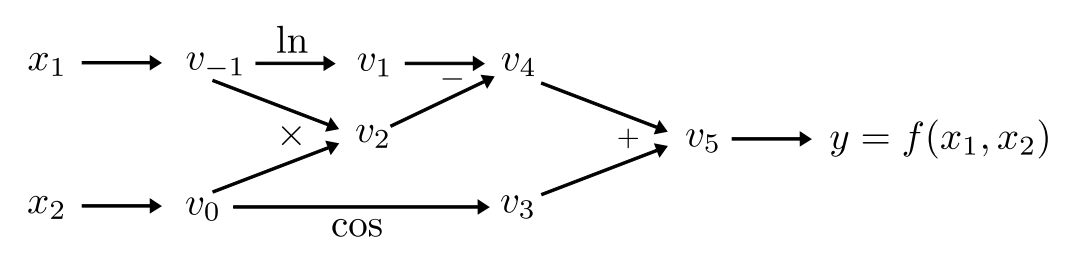

::: {.callout-tip}
### Exercise
Calculate value of $f(x_1,x_2)$ at $(x_1, x_2) = (2,1)$ via passing the diagram from left to right:
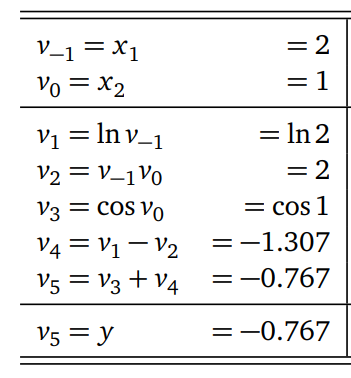
:::




## Calculating gradients

### Automatic differentiation allows us to calculate exact value of the gradient at given point. In our example, we are interested in value of $\frac{\partial f}{\partial x_1}$ at given point $(x_1, x_2) = (2,1)$. 

### Forward-mode AD is implemented by complementing each intermediate variable $v_i$ with a derivative:
### \begin{equation}
\dot{v}_i = \frac{\partial v_i}{\partial x_1},
\end{equation}
### and by applying chain rule for differentiation we can obtain desired gradient. Derivativeas are propagated forward in sync with the function evaluation.

### Example: $\frac{\partial f}{\partial x_1} = \dot{v}_5$ at $(x_1, x_2) = (2,1)$ through passing the diagram:
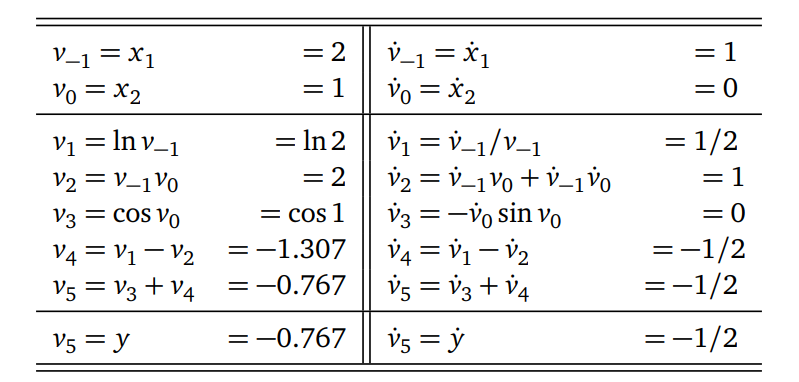

::: {.callout-note}
## Dual numbers and forward-mode AD

### In practive, forward-mode is implemented by extending the algebra of real numbers via introducing $\textit{dual}$ numbers, defined as
### \begin{equation}
 \tilde{z}_1 = a_1 +\epsilon b_1,
\end{equation}
### where $a,b \in \mathbb{R}$, and $\epsilon^2 = 0$. Next, addition and multiplication of dual numbers is defined as:

###  1. Addition: $z_1 + z_2 = (a_1 + a_2) + \epsilon(b_1 + b_2)$
 
###  2. Multiplication: $z_1z_2 = a_1a_2 + + a_1b_2\epsilon +b_1a_2\epsilon + b_1b_2\epsilon^2 = a_1a_2 + \epsilon(a_1b_2+a_2b_1)$
 
###  Next, when we consider Taylor series expansion around $\epsilon$, we have
 
###  \begin{equation}
 f(z) = f(a+\epsilon) = f(a) + f'(a)\epsilon + \frac{1}{2}f''(a)\epsilon^2 + \dots,
 \end{equation}
### we see that this simplifies to
### \begin{equation}
 f(a+\epsilon) = f(a) + \epsilon f'(a),
 \end{equation}
###  which means that operations on dual number $a$ automatically provides numerical value for $f(a)$ and derivative $f'(a)$.

### In numerical implementation, dual numbers are handled by operator overloading where all mathematical operators are working appropriately on the new algebra of dual numbers.
:::

## Calculating gradietns with PyTorch: torch.autograd

### torch.autograd is PyTorch’s automatic differentiation engine that helps in neural network training.


### Example 1

In [ ]:
import torch

# Create tensors with requires_grad set to True
x = torch.tensor([1.0], requires_grad=True)
y = torch.tensor([1.0], requires_grad=True)
z = torch.tensor([1.0], requires_grad=True)
# Define a function that takes two variables as input and returns their sum
def f(x, y, z):
    return torch.log(torch.sin(x) + torch.tanh(y**2))/z

# Compute the gradient of f with respect to x and y
g = f(x, y, z)
g.backward()

# The gradients of f with respect to x and y are stored in x.grad and y.grad
print(x.grad)   
print(y.grad)   
print(z.grad)   

tensor([0.3370])
tensor([0.5240])
tensor([-0.4719])


### Example 3  Quantum Harmonic Oscillator and a double well potential

### Let us consider eigenproblem for the double well potential modeled as a quantum harmonic oscillator with the barrier modeled as a gaussian profile:

### \begin{equation}
\begin{split}
\hat{H}\psi_n(x) & = E_n(x)\psi_n(x) \\
\hat{H} & = -\frac{1}{2}\frac{\partial^2}{\partial x^2} + \frac{1}{2}x^2 + \kappa e^{-x^2/2}
\end{split}
\end{equation}

### We are interested in change of the ground state energy $E_{0}$ as a function of $\kappa$ parameter.
To tackle this problem, we have to first calculate eigenstates of the considered Hamiltonian. 

### Let us consider equaly distributed set of points  $x_i$ lying in interval $[-L/2, L/2]$ with $\Delta x = \frac{L}{N_x}$, where $N_x$ is a number of discretization points.

### First, we have to, i.e. solve the eigenproblem of the form
### \begin{equation}
\bar{H}\vec{\psi}_n = E_n \vec{\psi}_n,
\end{equation}
### where $\bar{H}$ is $N_x\times N_x$ matrix representation of Hamiltonian $\hat{H}$ in a discretized space. After constructing the matrix $\bar{H}$, we can diagonalize it, and find eigenvectors $\vec{\psi}_n$, and corresponding eigenvalues $E_n$. Note, $n\in \{0,N_x\}$.

::: {.callout-note}
### Discrete second-order derivative and Hamiltonian matrix representation
### To construct the matrix representation of $\hat{H}$, we have to implement discrete second order derivative:
### \begin{equation}
 \frac{\partial^2 \psi(x)}{\partial x^2}\big|_{x} \approx \frac{\psi_{i+1} - 2\psi_i + \psi_{i-1}}{\Delta x^2}
\end{equation}


The matrix representation of the kinetic part of the Hamiltonian $\hat{H}$ is

\begin{equation}
\bar{H}_{\text{T}} = -\frac{1}{2}\frac{1}{\Delta x^2}\begin{bmatrix}
-2 & 1 & 0 & 0 & 0 & . \\
1 & -2 & 1 & 0 & 0 & . \\
0 & 1 & -2 & 1 & 0 & . \\
0 & 0 & 1 & -2 & 1 & . \\
0 & 0 & 0 & 1 & -2 & 1 \\
. & . & . & . & . & . 
\end{bmatrix}  
\end{equation}

### The matrix representation of the potential part of the Hamiltonian $\hat{H}$ is
a diagonal matrix with elements $[\bar{H}_\text{V}]_{i,j} = \delta_{i,j} \big(\frac{1}{2}x_i^2 + \kappa e^{-x_i^2/2} \big)$

### Now, the Hamiltonian matrix representation is simply $\bar{H} = \bar{H}_T + \bar{H}_V$.
:::



In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.linalg import eigh

### Let's define function returning matrix of the considered Hamiltonian.
### First, let's define system size $L = 10$, $N_x$ discretization points, function returning external potential and function returning matrix representation of the Hamiltonian:

In [ ]:
L = 10
Nx = 100
x = torch.linspace(-L/2,L/2,Nx)
dx = x[1]-x[0]



def get_potential(x,kappa):
    return 0.5*x**(2.0) + kappa*np.exp(-(x)**2/2) 
    
def get_H(kappa):
    H_T = torch.zeros((Nx,Nx))
    ones = torch.ones(Nx)
    H_T = -0.5/dx**2*( torch.diag_embed(ones[:-1], offset = 1) - 2*torch.diag_embed(ones, offset = 0) + torch.diag_embed(ones[:-1], offset = -1))  
    H_V = torch.diag(get_potential(x,kappa))
    H = H_T + H_V
    return H

### Let's have a look at potential shape for different parameters $\kappa$:

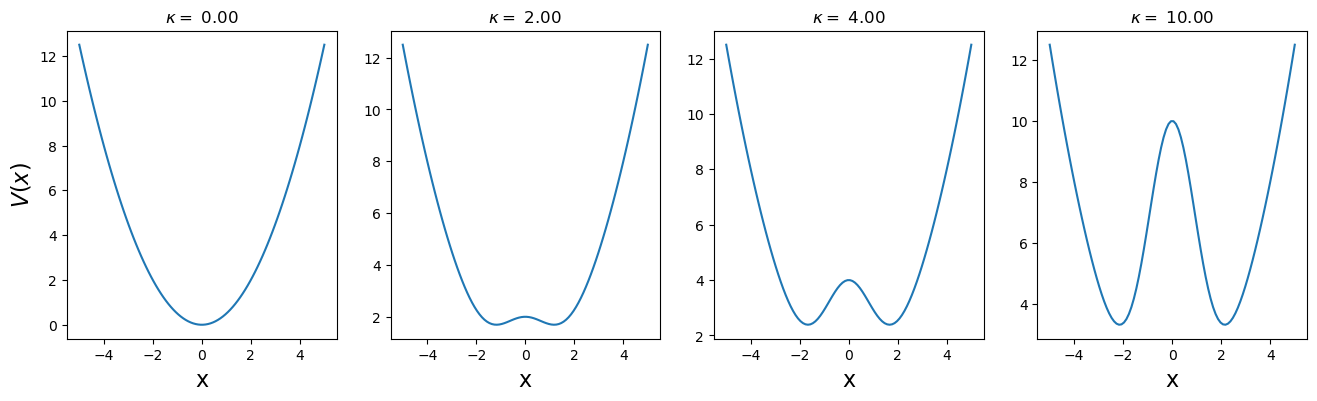

In [ ]:
kappa_vec = torch.tensor([0, 2, 4, 10])
 
N_kappa = kappa_vec.size(0)
 
fig, ax = plt.subplots(1, N_kappa, figsize=(16,4))
FontSize = 16
for kappa_i in range(0, N_kappa):
    kappa = kappa_vec[kappa_i]
    V = get_potential(x,kappa)
    ax[kappa_i].plot(x,V.detach().numpy())
    ax[kappa_i].set_title(r"$\kappa = $ " + "{:2.2f}".format(kappa.item()))
    ax[kappa_i].set_xlabel("x",fontsize=FontSize)
ax[0].set_ylabel(r"$V(x)$",fontsize=FontSize)
plt.show()

### Pytorch function torch.eigh calculates eigenfunctions and eigenvalues of a given matrix: this allows us to write two functions returning ground state energy $E_{\text{GS}}$, and ground state gap $\Delta E$, i.e. energy difference between two first eigenenergies:

In [ ]:
def get_energy_ground_state(kappa):
    H = get_H(kappa)
    Energies, Vectors = eigh(H)
    E_GS = Energies[0]    
    return E_GS

def get_gap(kappa):
    H = get_H(kappa)
    Energies, Vectors = eigh(H)
    gap = Energies[1] - Energies[0]    
    return gap

### Let's see density of few first eigenstates of the Hamiltonian for given parameter $\kappa$:

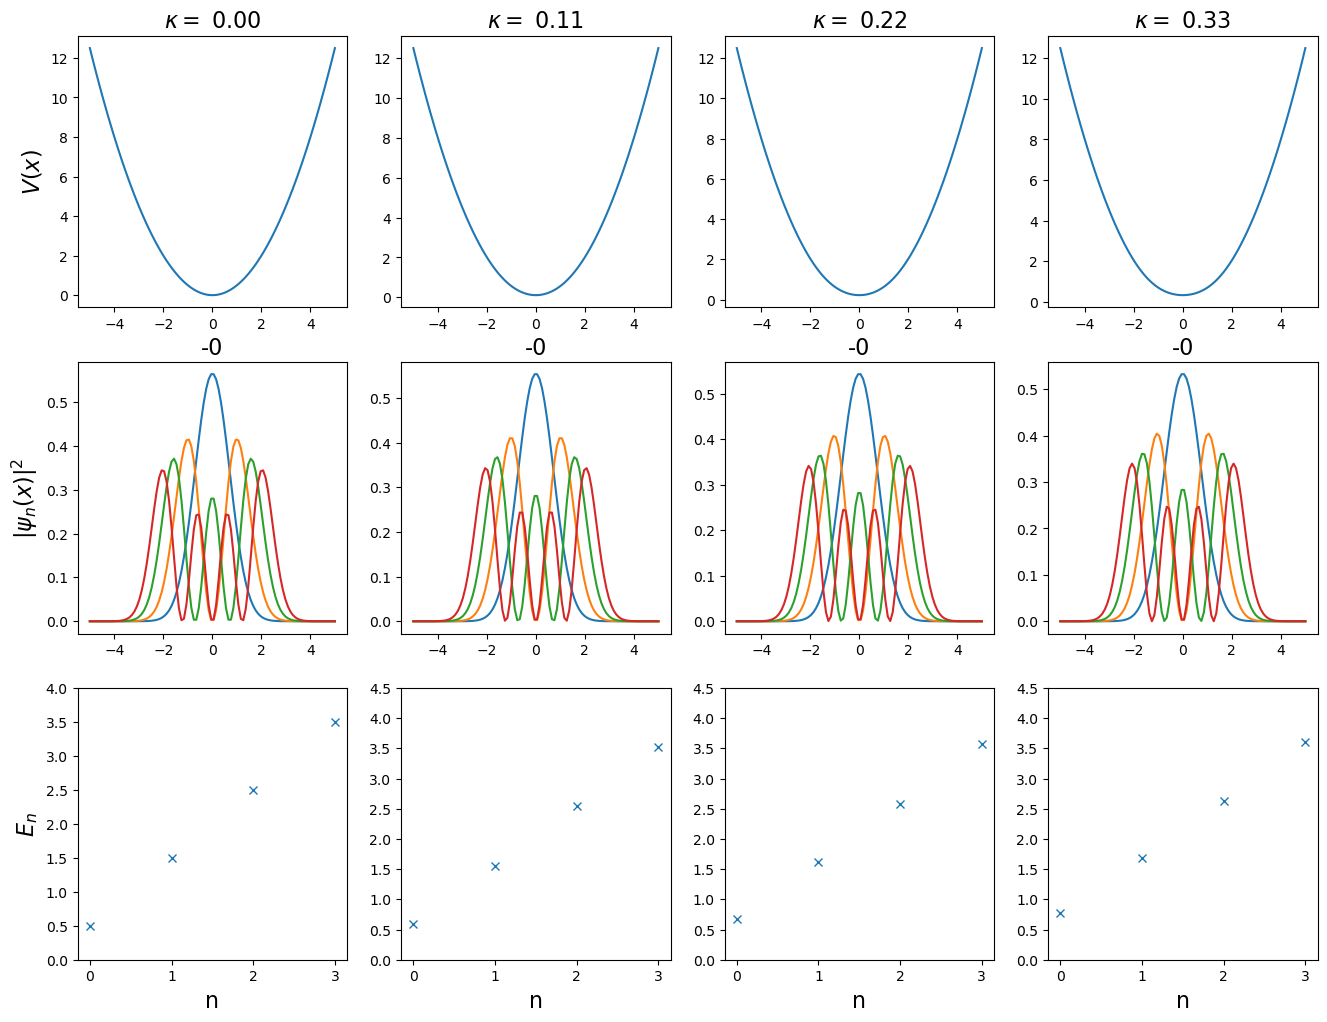

In [ ]:
fig, ax = plt.subplots(3, N_kappa, figsize=(16,12))
FontSize = 16
for kappa_i in range(0, N_kappa):
    kappa = kappa_vec[kappa_i]
    V = get_potential(x,kappa)
    ax[0,kappa_i].plot(x,V.detach().numpy())
    ax[0,kappa_i].set_title(r"$\kappa = $ " + "{:2.2f}".format(kappa.item()),fontsize=FontSize)
    ax[0,kappa_i].set_xlabel("x",fontsize=FontSize)

    H = get_H(kappa)
    Energies, Vectors = eigh(H)
    rho = torch.abs(Vectors)**2/dx
    n_max =  4            # maximal number of eigenstates
    E_max = Energies[n_max] #
 
    for i in range(0,n_max):
        ax[1,kappa_i].plot(x,rho[:,i].detach().numpy())
    ax[2,kappa_i].plot(Energies[0:n_max].detach().numpy(),'x')
   
    ax[0,kappa_i].set_xlabel("-0",fontsize=FontSize)

    ax[2,kappa_i].set_xlabel(r"n",fontsize=FontSize)
    ax[2,kappa_i].set_yticks(np.arange(0,E_max,0.5))
    
    
ax[0,0].set_ylabel(r"$V(x)$",fontsize=FontSize) 
ax[1,0].set_ylabel(r"$|\psi_n(x)|^2$",fontsize=FontSize) 
ax[2,0].set_ylabel(r"$E_n$",fontsize=FontSize) 
plt.show()

### Now, let's check how ground state energy changes with $\kappa$:

Text(0, 0.5, 'energy gap $\\Delta{E}$')

<Figure size 640x480 with 0 Axes>

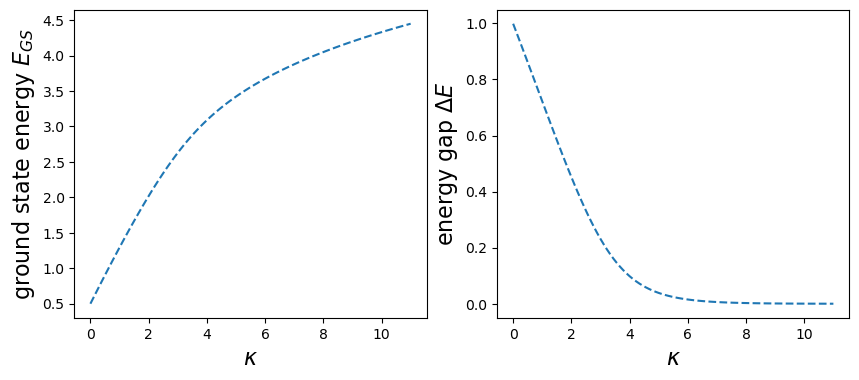

In [ ]:
fig = plt.figure()
E_gs_vs_kappa = []
gap_vs_kappa = []
kappa_max = 11
kappa_vec = np.linspace(0,kappa_max,100)
for kappa in kappa_vec:
    E_gs_vs_kappa.append([get_energy_ground_state(kappa)])
    gap_vs_kappa.append([get_gap(kappa)])
    
FontSize = 16
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(kappa_vec, E_gs_vs_kappa, '--')
ax[1].plot(kappa_vec, gap_vs_kappa, '--')
ax[0].set_xlabel(r"$\kappa$",fontsize=FontSize)
ax[0].set_ylabel(r"ground state energy $E_{GS}$",fontsize=FontSize)
ax[1].set_xlabel(r"$\kappa$",fontsize=FontSize)
ax[1].set_ylabel(r"energy gap $\Delta{E}$", fontsize=FontSize)

## Derivative $\frac{d E_{\text{GS}}(\kappa)}{d \kappa}$ at given $\kappa$ using torch.autograd:

In [ ]:
kappa_fixed = torch.tensor(10., requires_grad = True)
E_GS = get_energy_ground_state(kappa_fixed)
E_GS.backward()
print(kappa_fixed.grad)

tensor(0.1249)


### Let's plot $\frac{d E_{\text{GS}}(\kappa)}{d \kappa}$, and $\frac{d \Delta E_{\text{GS}}(\kappa)}{d \kappa}$

Text(0, 0.5, '$\\frac{d\\Delta E}{d\\kappa}$')

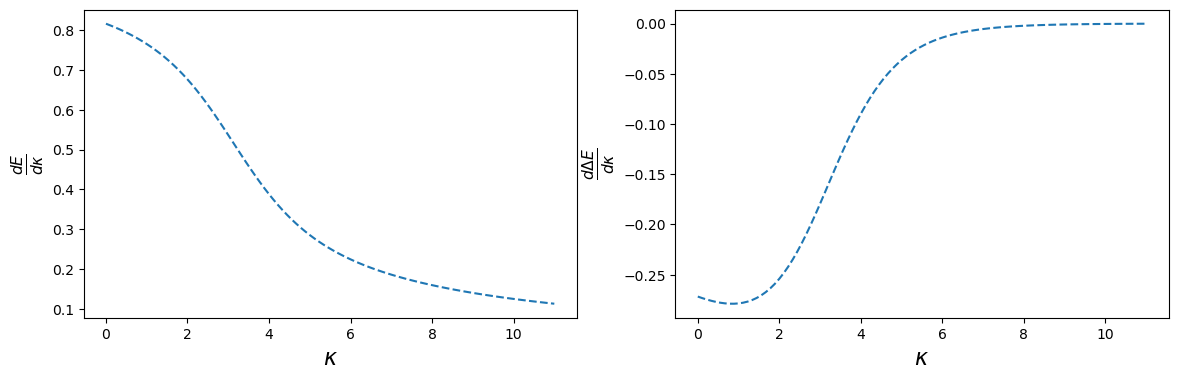

In [ ]:
dEdkappa = []
dgapdkappa = []
for kappa in kappa_vec:
    kappa_fixed_1 = torch.tensor(kappa, requires_grad = True)
    E_GS = get_energy_ground_state(kappa_fixed_1)
    E_GS.backward()
    diff = kappa_fixed_1.grad
    dEdkappa.append([diff.item()])
    
    kappa_fixed_2 = torch.tensor(kappa, requires_grad = True)    
    gap = get_gap(kappa_fixed_2)
    gap.backward()
    diff = kappa_fixed_2.grad
    dgapdkappa.append([diff.item()])    

fig, ax = plt.subplots(1,2,figsize=(14,4))
ax[0].plot(kappa_vec,dEdkappa,'--')
ax[1].plot(kappa_vec,dgapdkappa,'--')
FontSize=16
ax[0].set_xlabel(r"$\kappa$",fontsize=FontSize)
ax[0].set_ylabel(r"$\frac{dE}{d\kappa}$",fontsize=FontSize)

ax[1].set_xlabel(r"$\kappa$",fontsize=FontSize)
ax[1].set_ylabel(r"$\frac{d\Delta E}{d\kappa}$",fontsize=FontSize)